Code to simulate two state majority vote on networks of varying incoherence 

In [1]:
using LightGraphs, GraphIO, GraphPlot, NetworkDynamics, OrdinaryDiffEq, Plots, LightGraphs, Printf


#f=open("net_celegans_neural.dat")




In [2]:
using LinearAlgebra, IterativeSolvers, Statistics
#Function which calculates Trophic Level


function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    h= bicgstabl(Lambda, v, 10)
    #h=  lsmr(Lambda, v)   
       
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [3]:
#Function to calculate Trophic Incohrence 


function calc_troph_incoh(A,h)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

maj_vote_update (generic function with 1 method)

In [12]:
using LinearAlgebra, OrdinaryDiffEq, Random
using Arpack


#setting up network number and size of network N

number=200

N=500

#Update per network
updates= 50

#Range of T control paramater can be linear or log 

#T_list= LinRange(0.025, 8, number)

T_list= 10 .^ (range(-2,stop=2,length=number))


#T_list= 1.2*ones(number)

B=0

F_list = zeros(0)




#Number of edges 
L_targ = 20*N

stop= 2*N^2

eig_list= zeros(0)

r_list= zeros(0)

state_list = zeros(0)


#stop = 5

#w_in=1

for n in 1:number
   
    println(n)
    
    
    g = SimpleDiGraph(N)
    
    #Intial Graph to add edges to 

    for i in (1+B):N
        
        pick = rand(B+1:N)
        
        add_edge!(g, pick, i)
        
        
        end 
    A = (adjacency_matrix(g))
    
    L=sum(A)
    
    h = get_levels(A)
    
    
    edgelist= Int[]
    
    problist= zeros(0)
    
    edge_start= zeros(Int64,0)
    
    edge_end = zeros(Int64, 0)
    
    #Calculate Probablities of Adding edges 

    for i in 1:N
        
        for j in (B+1):N
            
            if A[i,j]!=1 && i!=j
                #Fix Array indexing here doesn't make sense. Need 2d array
                append!( edgelist, [i,j] )
                append!( edge_start, i )
                append!(edge_end, j )
                
                prob = exp(-((h[j]-h[i] -1)^2)/T_list[n]/2) + 0.00000000000001
                
                
                
                append!( problist, prob )
            end
            
            
            
            end
        
            end 
    
    prob_sum = sum(problist)
    
    loop_size= size(problist, 1)
    
    
    
    #More Effieciemt sampling of probabilities of edges addition 

        
    count=0
    
    
    
    while (-L + L_targ)>0
        
        count = count + 1 
        
        prob_sum = sum(problist)
        
        random = prob_sum*(rand())
        
        
        z=0
        
        
        for k in 1:loop_size
            
            z= z + problist[k]
            
           
            if z>=random
               
                if A[edge_start[k],edge_end[k]]==0
                
                   A[edge_start[k],edge_end[k]]=1
                    
                   problist[k]=0 
                
                    L = L +1
                    
                    break
                       
                else 
                    
                    println("Missed")
                    println(A[(edgelist[k])])
                    break
                   
              
                end     
            
            end
                end
            
            if (count-stop)>=0
            
                
                
            
                break
        
            
            
                end
        
    end
        
    
    
    

#Get basic data. 
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A,h)    
append!( F_list, F )  
    
#println(maximum(real(eigvals(Matrix(A)))))

    
append!( eig_list, maximum(real(eigvals(Matrix(A))))  )  

g= SimpleDiGraph((A))    
    
#Set up intial conditions for dyanmics.    

    
#x0 =  zeros(0) 
    
#frac=  0.*maximum(h) 
frac= floor(Int,0.05*N)
    
#for i in 1:N
        
      #append!(x0, (sign(h[i] - frac )) ) 
        
        
    #end

sorted = (sortperm(h))    
    
#x0 = sign.(h .- frac)
    
    
x0= ones(N)
   
    
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    println(h[sorted[b]])
    end

    
x= x0 

#Do update loop for dyanmics

for i in 1:updates
        
        x_old= copy(x)
        for i in 1:N
        
        in_connections= inneighbors(g,i)
        
        sums = 0
        for v in in_connections
        sums= sums + x_old[v]
        end
        
        x[i] = sign(sums)
    end
    
       
        
        
        
    end
        
        
        
    
append!(state_list, sum(x))    
    
    
    
    
 
end



println(F_list)




1
0.0
8.881784197001252e-15
0.9999997659730155
1.0000010272882207
2.0000000044689585
2.0000048586547425
3.000009193257858
4.000010577685114
4.000010793592903
4.00001079386778
5.000011338833676
5.000011370355059
5.000011414727624
6.000011475575304
6.000011478138145
6.000011478318186
6.0000114784622856
6.000011479531576
6.000011479732901
6.000011480215054
6.000011480574516
6.000011481629121
6.000011481918136
6.000011482755841
6.00001148297418
2
0.0
4.472826678370012e-5
0.00010847748048981032
0.001683348544910146
0.0023703664243726053
0.0024269013228952474
0.005305579074769362
0.007428772633129022
0.007434413343900381
0.9758948117215631
0.9759171725138351
0.9759199741051914
0.9759210435713088
0.9759351780529055
0.9759357820139511
0.975942473170667
0.9759452461864351
0.9759453349854468
0.9759581350648778
0.9766527789530652
0.976673473830278
0.9766753285463317
0.9766860643479571
0.9767309659508809
0.9767489537052372
3
0.0
1.2963763396101058e-9
1.4137260251345651e-9
2.0422099566985707e-9
2.1

0.0
0.00011083155469648887
0.04528123799541639
0.047497872006033504
0.04808344937377562
0.053242014266031035
0.05464806933361466
0.061157659124697616
0.08787203429899826
0.12881437746960955
0.1291243580512731
0.14329396821834628
0.18762908173661152
0.2047346557269254
0.9719411287246018
0.9988362724563533
0.9992388902267795
1.0275491025569732
1.0275491035715447
1.0275491051391423
1.0275491060945683
1.04570225585916
1.0484357725043782
1.0666670559744151
1.0679364743461015
19
0.0
0.1611486802599238
0.16809924363754192
0.22960013086014897
0.23165042942974168
0.41844697794655517
0.4618656468856379
0.49200709901482753
1.081958079815724
1.131928969505985
1.1606918003395776
1.262963889880698
1.309551724061862
1.853146172482571
1.9178041881237924
1.9642635008934395
2.04986022214476
2.0675917711544454
2.67510673026905
2.6821076365669665
2.8318006266511055
2.850927493188273
2.949504807972838
3.0272481937365914
3.554801872880656
20
0.0
2.0184032223369286e-10
5.397851055022329e-10
5.481091136516625

0.0
5.098144129078719e-13
9.43245481721533e-13
2.8776980798284058e-12
0.9999999999976321
1.0000000000058797
1.0000000000058797
1.0000000000058797
1.0000000000077716
1.0000000000173888
1.9740653202021097
1.9740653203457086
1.9740653205022216
2.0375736256647183
2.0402304133982003
2.9468759958940254
2.946875996035269
2.9468759966611078
2.9468759981076715
2.9468759987398716
2.9473639739158095
2.9811052048449014
3.862302030277692
3.8631815947988155
3.895040272493098
37
0.0
3.907985046680551e-14
5.684341886080802e-14
5.684341886080802e-14
0.9999999999735465
0.9999999999735465
0.9999999999735785
1.0000000000119584
1.9999999999066809
1.9999999999373816
1.9999999999373816
2.999999999776332
2.999999999776394
3.99999999963077
3.9999999996307736
3.9999999996307896
3.999999999630795
4.99999999949028
4.999999999490633
5.999999999336733
5.999999999336941
5.999999999336941
5.999999999337124
6.999999999279639
6.999999999279787
38
0.0
4.973799150320701e-14
7.105427357601002e-14
9.947598300641403e-14
1.3

0.0
0.06232875928067205
0.17278476437230328
0.7139836712574432
0.7658222934665728
0.7703224590511564
0.7855822723789521
0.7930346381346087
0.7962303975400236
0.8097144020195053
0.8149728447677385
0.8268779307800607
0.8277865002788021
0.8339015608305731
0.8362356611098978
0.8418392943969017
0.8433467544947852
0.8447290172575812
0.847455576476519
0.8489242992447128
0.8550754416847033
0.8606160578089428
0.8629082532834689
0.8658339718921448
0.8708435805358992
55
0.0
0.00791966529403254
0.6757595067920263
0.7533455905876565
0.8395507640712268
1.2328255142100417
1.3041025000905364
1.4826792851373867
1.5728446541365457
1.759098923492978
2.1648397100785637
2.238561887819415
2.3678482340141613
2.7229648162446303
2.9511715756378294
3.2958363111462248
3.4098556659861643
3.466399146989012
3.5078462561801658
3.523874819373855
4.047927996247985
4.14349567072756
4.182602796823705
4.205606699733156
4.230814693309053
56
0.0
0.0012053340328170847
0.0148704614302968
0.07613659741656154
0.078594025582406

0.0
0.07330514534276844
0.0780989689332543
0.22283452815001858
0.2305168764275649
0.7581033852431407
0.8138383886750322
0.9134853513263383
0.945293150240639
0.9597111329436903
1.0051704542488746
1.0285368938732198
1.037569014054128
1.071268886784253
1.563108703035697
1.650843565710984
1.6535824449397118
1.6648242141221203
1.6796205963911905
1.681925756078801
1.7363329214007344
1.743945739359022
1.7652492503590835
1.7860057964150364
1.8619863146146223
73
0.0
0.03646443835964153
0.11353928267869318
0.8541422502946032
0.9958540297649776
1.5635504427308433
1.7556579385727344
1.8379635903743266
1.8954019471510914
2.3815270353259015
2.4496362621798946
2.5056572773382957
2.5164069543152614
2.627160025080774
2.7834419041932383
2.857218169321772
2.871439643508471
2.9197136294855843
2.962886368953135
3.2374391879672517
3.292395648547667
3.333042976156869
3.3391000427901627
3.410403238360816
3.518131841247083
74
0.0
0.008696489469940616
0.01853761105345697
0.03185958261488864
0.03392814578571901


0.0
0.06341713453611852
0.08836172948286602
0.10298689871717848
0.10497681825678029
0.11870230084372224
0.17764698729200035
0.19014962791448298
0.2076712984218716
0.21126980642983284
0.23189851923374327
0.23507255339358046
0.23670466967927517
0.24868934400487674
0.2590629000337614
0.26013638795535954
0.2616696068440305
0.2651323684720648
0.2711661121482294
0.2906636441618673
0.29769966887161914
0.31359188084567435
0.3336092822208858
0.3410099367446815
0.3827730695970253
91
0.0
0.007638341146874339
0.10706119915724521
0.26206824465208456
0.3042048322777253
0.3619713480214912
0.41620949137384944
0.49074337292296377
0.4945231149032576
0.7035282143429074
0.8322578797133104
0.8846460067160029
0.9055785214519974
1.0023248432301974
1.036325157766294
1.0527451539562263
1.0959548809575983
1.1071037288270826
1.4884922471351505
1.5050040228338029
1.5454128576923711
1.5745869422298568
1.6002781864322477
1.6005530355548334
1.6420192965276428
92
0.0
0.029380770277294133
0.050044463942694684
0.182891

108
0.0
0.1463331757350783
0.19368250605928683
0.21691861494398612
0.2275785390977374
0.23286563753464495
0.3777824278053252
0.5509292081498973
0.5525783828378339
0.565041414898217
0.6161125512189356
0.7927908373973818
0.8007034922123291
0.820619992125307
0.8258099294253958
0.8604051642271475
0.8776347959539796
0.9693360179681196
0.9819899104209977
1.1464751159027857
1.2127969814349262
1.2797578760131145
1.37503598755419
1.4598422630159424
1.5512880356424388
109
0.0
0.012420845273060976
0.07863858619977826
0.09235413598266717
0.17572302905640313
0.1997247437890195
0.2275032272503914
0.24846310808939798
0.3465139941246118
0.34975754278964644
0.3587147471995973
0.4097062859168421
0.4444900440061197
0.5013383789641601
0.5018882839911747
0.5285827315213414
0.5418130840524622
0.655896161151821
0.6934237242956929
0.7293464932638312
0.7615609029742085
0.7633913837165114
0.889643818765494
0.9556340303986186
1.0119191655561437
110
0.0
0.11082015479078944
0.1448114178199731
0.16276828547182554
0

0.0
0.2404459149397996
0.28143896777332267
0.368841771925607
0.38547583414108566
0.4085921845412879
0.4897056220705004
0.4901515281843477
0.4986687688337643
0.5132736156693698
0.5418030567372119
0.5456402783363044
0.5748358291281469
0.5879373850484317
0.6116157859464494
0.6129228588951593
0.6176886842688794
0.6243436129311427
0.6371243151051763
0.6399606736918996
0.6497670283648522
0.6512307200435302
0.6543648517020544
0.6596872389572277
0.6636086183700827
127
0.0
0.01796743001527057
0.04160238795123794
0.041659340506738474
0.06272349906666941
0.11613157195103385
0.12625614444451072
0.15942073289943748
0.1775010650701101
0.18232581848129836
0.18729271293350291
0.20074537976437945
0.21722500865056538
0.22006152493585418
0.2203241419334483
0.22888363858509986
0.25301808038752216
0.2540311733558589
0.25524875816739034
0.26114159451220975
0.28088846892567654
0.2925227439971987
0.29772634675693
0.3036997954883909
0.3121148484904088
128
0.0
0.02860485446390726
0.14328098361016206
0.192297952

144
0.0
0.19753547203721666
0.34936768873803814
0.5059310316620476
0.5142415874073034
0.5443094693729913
0.5854352668279086
0.6286709529158303
0.6910574562382159
0.6942882837301187
0.7178106819007359
0.7486739047347104
0.7694951799556105
0.811613153636519
0.8219083410901167
0.9228991386807932
0.9743329824118376
0.9761730385898364
0.9817334848338266
0.9955473579689516
1.0009569031043988
1.0013555820255036
1.0036944424279657
1.0232282069302752
1.101736351573714
145
0.0
0.9999999999909832
1.3513290596447352
1.85050741536834
2.203479763585238
2.322069156964493
2.3496857710995154
2.3625477269353192
2.374431157876614
2.4838560118000146
2.53756334866676
2.549055369851708
2.611247821142659
2.648670940330881
2.6738135663955576
2.7221268584129255
2.815696439994079
2.853837677399065
2.863734313995182
2.8815838583768647
2.9823136079669728
3.13811070560983
3.171782150928449
3.1782211115395445
3.1900020471372685
146
0.0
0.0600428883140629
0.1366328610406371
0.1441347587695465
0.146980888344737
0.147

0.0
0.08820376581425327
0.1352952637057513
0.14424037633973252
0.18554821499162794
0.19841206379141973
0.22919359636284725
0.2310490850016656
0.23763597995834707
0.23970068779226128
0.2435371919770865
0.24461189323978555
0.26093261287929614
0.2656672313845125
0.26762295778787776
0.2716069340666925
0.27219308753915517
0.28477732632758823
0.29113039330255547
0.29390939080973555
0.2978660174327446
0.3007773034429547
0.31165995478245667
0.3152732675284988
0.3204548401431577
163
0.0
0.025449470914218564
0.08655928343748776
0.13599305480537272
0.15639155002291982
0.1701854041634272
0.21840597776268722
0.25433906873016165
0.2683162674143156
0.2873496764489949
0.2987873444042599
0.2989544474942605
0.30419090767710943
0.3305794128773005
0.33493007442997436
0.3578353876858993
0.36496284305162097
0.37708528536023844
0.3790856340997373
0.3808503299497923
0.3824181543098861
0.38324690447735055
0.3970635862740348
0.39877895484844283
0.404572721044427
164
0.0
0.13048990804725813
0.2101359646939256
0.

180
0.0
0.10515847338829687
0.20734707156087206
0.22167434178950784
0.23467941594673558
0.23646361040978947
0.2366050268848815
0.26034998666427994
0.2845972501410352
0.28461550563467575
0.28554603722957184
0.29063478284189653
0.3093712478418
0.33403798243628136
0.3355131111709686
0.34867716714117064
0.349160249633551
0.36985176327859054
0.3783121870621239
0.38170707055129116
0.38175006876173634
0.38404499930781466
0.38436588427049884
0.3847602741592516
0.3852948940101547
181
0.0
0.008031957730414097
0.01059136640402647
0.06752121908028497
0.17290016557772836
0.18354486670333892
0.2002179817208496
0.20116636922821518
0.22960775519903215
0.24196859794639902
0.24666835000445725
0.25611853389115463
0.268114937801613
0.2763307594433216
0.27726961085881396
0.2881804238665528
0.2909052407210855
0.29185853313961685
0.3066163309342188
0.3138580874613947
0.3171360137622393
0.3197538389349115
0.3308704755729732
0.3314513847181541
0.3347039453132223
182
0.0
0.13480541160190407
0.17179185254860563


0.0
0.020142935970759557
0.02161925880665927
0.08300135783963136
0.1003423722057199
0.10266569707837492
0.12207972948417994
0.12751905077097297
0.14033265896526642
0.15256085020382854
0.158456960037122
0.1689686164846469
0.17091174011997962
0.1783345803058991
0.1842515817695053
0.1895786715447782
0.19055121424487775
0.19166629659634404
0.19219241216186428
0.20050055909000813
0.21288034877648493
0.22258793150876027
0.22317419612072475
0.23923985313586482
0.24061941710716261
199
0.0
0.0011993321325522999
0.028008659269069758
0.03643824860841266
0.04320968501418948
0.046635182517180296
0.07888046431945578
0.08597287407398879
0.0861838528188944
0.09389978391988596
0.09480029237442028
0.10577107513349726
0.10784760720068393
0.11145015977818473
0.11181240376012919
0.1212565636130929
0.12224196939694343
0.12533283684323143
0.13217994855915993
0.13482645549188266
0.13716865138280088
0.13851657010279222
0.13971933606051246
0.14062734906790553
0.14309839652460615
200
0.0
0.013718694221700412
0.0

Plotting the results.

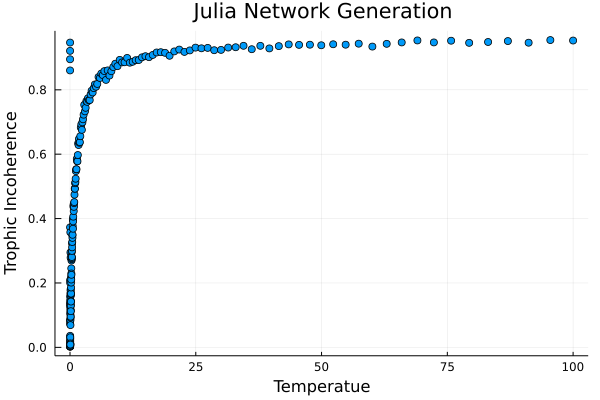

In [13]:
using Plots

plot(T_list,F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_log_space.pdf")

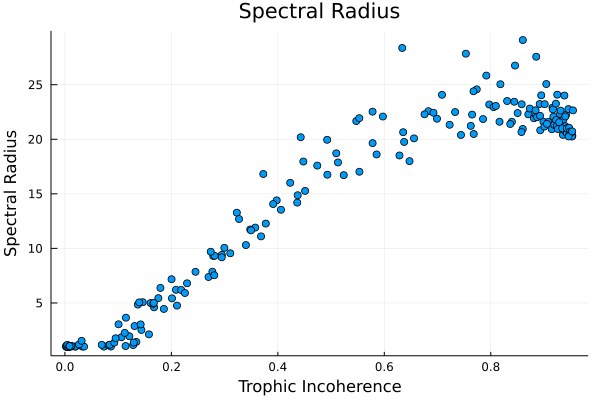

In [14]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Spectral Radius", title= "Spectral Radius")


#savefig("Julia_generation_Spec_radius_logspace_2.pdf")

In [18]:
plot(F_list, state_list/N, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Average State of System", title= "Majority Vote Dynamics", ylim=(-1.05,1.05))


#savefig("Majority_Vote_N_500_lowest_5_percent_GRS3.pdf")

In [16]:
plot(F_list, cos.(phase_list), seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Cosine of Average Phase", title= "Final Phase when the lowest tenth modified")

#savefig("Kuramoto_0.1_controls_dynamics_2.pdf")

LoadError: UndefVarError: phase_list not defined

In [17]:
plot(eig_list, r_list, seriestype = :scatter, legend = false, xlabel= "Spectral Radius",

ylabel="R Phase Coherence", title= "Oscillator Synchronization Spectral Radius")

DivideError: DivideError: integer division error